In [ ]:
%pip install opencv-python
%pip install matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

Dimensões da imagem 1: (626, 455, 3)
Dimensões da imagem 2: (1024, 1024, 3)


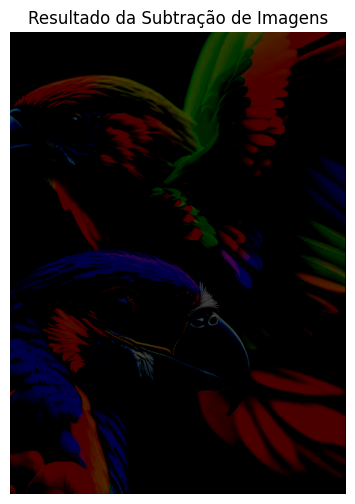

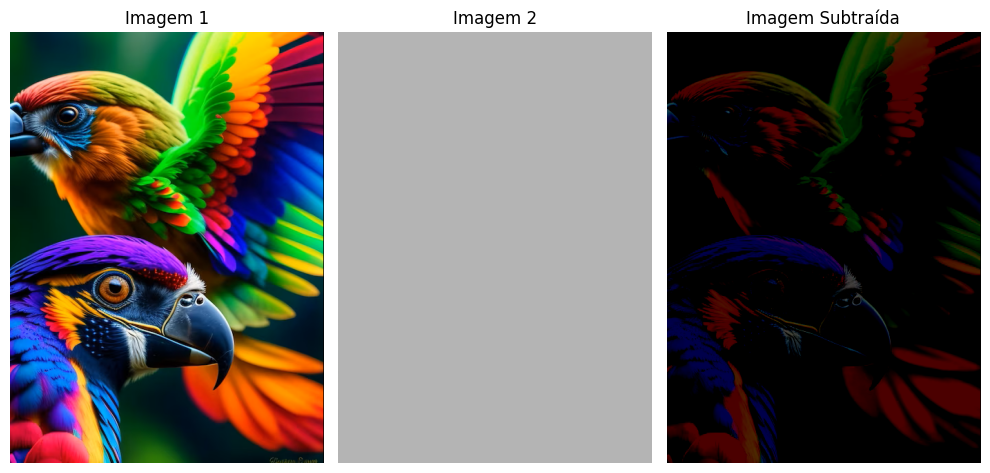

True

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para carregar em escala de cinza ou coloridas
def load_images(image_path1, image_path2, color=False):
    if color:
        image1 = cv2.imread(image_path1, cv2.IMREAD_COLOR)
        image2 = cv2.imread(image_path2, cv2.IMREAD_COLOR)
    else:
        image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
        image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)
    
    return image1, image2

# Função para subtrair as imagens
def subtract_images(image1, image2):
    # A função cv2.subtract lida com valores negativos adequadamente
    result = cv2.subtract(image1, image2)
    return result

# Caminhos das duas imagens
image_path1 = 'passaros.png'
image_path2 = 'Cinza.png'

# Carregar as imagens (em colorido ou escala de cinza)
# Use color=True se quiser subtrair imagens coloridas, senão deixa como False
image1, image2 = load_images(image_path1, image_path2, color=True)

# Verificar as dimensões das imagens
print(f"Dimensões da imagem 1: {image1.shape}")
print(f"Dimensões da imagem 2: {image2.shape}")

# Redimensionar a segunda imagem para que tenha as mesmas dimensões que a primeira, se necessário
if image1.shape != image2.shape:
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Subtrair as imagens
result_image = subtract_images(image1, image2)

# Exibir a imagem resultante
plt.figure(figsize=(6, 6))
plt.title("Resultado da Subtração de Imagens")
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Ocultar os eixos
plt.show()

# Salvar a imagem resultante
cv2.imwrite('result_image.jpg', result_image)

# Exibir as imagens original e subtraída
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.title('Imagem 1')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Imagem 2')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Imagem Subtraída')
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  # Corrigido para result_image
plt.axis('off')

plt.tight_layout()
plt.show()

# Salvar a imagem resultante
cv2.imwrite('subtracted_image.jpg', result_image)  # Corrigido para result_image


1) A média das imagens combina os pixels, fazendo com que o ruído se cancele e a imagem fique mais limpa.
2) O código não vai funcionar, porque as imagens precisam ter o mesmo tamanho. Você precisaria redimensionar a imagem menor.
3) A imagem resultante ficará toda preta (pixels com valor zero), e isso não causa problemas.
4) O OpenCV transforma esses valores negativos em zero, então a área correspondente ficará preta na imagem.